# Finance Data Project 
In this data project I will focus on exploratory data analysis of stock prices. This project is just meant to work with the capabilities of pandas and visualization in python related to stock and financial analysis, it is not meant to be a robust financial analysis or be taken as financial advice.
____
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2023.

In [33]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

# Get Data

In this part yfinance module is used to download the historical stock data for Bank of America ('BAC'), CitiGroup ('C'), Goldman Sachs ('GS'), JPMorgan Chase ('JPM'), Morgan Stanley ('MS'), and Wells Fargo ('WFC') with their respective symbols within the specified date range.

In [2]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2023, 1, 1)

In [3]:
# Bank of America
BAC = yf.download('BAC', start=start, end=end)

# CitiGroup
C = yf.download('C', start=start, end=end)

# Goldman Sachs
GS = yf.download('GS', start=start, end=end)

# JPMorgan Chase
JPM = yf.download('JPM', start=start, end=end)

# Morgan Stanley
MS = yf.download('MS', start=start, end=end)

# Wells Fargo
WFC = yf.download('WFC', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#Checking the head of 'Bank of America' dataframe as an example
BAC.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.695652  16296700
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.348427  17757900
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.390099  14970700
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.341480  12599800
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.362309  15619400

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
#list of the ticker symbols
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In this part the bank dataframes are concatenated together to a single data frame called bank_stocks, and the keys argument are set equal to the tickers list.

In [6]:
#concatenating the bank dataframes
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
#Set the column name levels 
bank_stocks.columns.names=['bank ticker','stock info']

In [8]:
#Check the head of the bank_stocks dataframe
bank_stocks.head()

bank ticker        BAC                                                        \
stock info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695652  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348427  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390099  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341480  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362309  15619400   

bank ticker           C                                      ...         MS  \
stock info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

bank ticker                                       WFC                        \
stock info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310360  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333904  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428040  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463333  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828152  4144500  31.674999  31.825001  31.555000   

bank ticker                                  
stock info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695120  11016400  
2006-01-04   31.530001  19.466675  10870000  
2006-01-05   31.495001  19.445065  10158000  
2006-01-06   31.680000  19.559278   8403800  
2006-01-09   31.674999  19.556194   5619600  

[5 rows x 36 columns]

# EDA 
Let's explore the data a bit to gain insights and understand the characteristics of the data!

** What is the max and min Close price for each bank's stock throughout the time period?**

In [9]:
#calculating the max close price and its corresponding date
max_close_price=bank_stocks.xs('Close',level='stock info',axis=1).max()
date_max_close_price=bank_stocks.xs('Close',level='stock info',axis=1).idxmax()
max_close=pd.concat([date_max_close_price,max_close_price],axis=1)
max_close.columns=['Date','max_close_price']
max_close.sort_values('max_close_price',ascending=False)

Date  max_close_price
bank ticker                            
C           2006-12-27       564.099976
GS          2021-11-02       423.850006
JPM         2021-10-22       171.779999
MS          2022-02-09       108.730003
WFC         2018-01-26        65.930000
BAC         2006-11-16        54.900002

In [10]:
#calculating the min close price and its corresponding date
min_close_price=bank_stocks.xs('Close',level='stock info',axis=1).min()
date_min_close_price=bank_stocks.xs('Close',level='stock info',axis=1).idxmin()
min_close=pd.concat([date_min_close_price,min_close_price],axis=1)
min_close.columns=['Date','min_close_price']
min_close.sort_values('min_close_price',ascending=False)

Date  min_close_price
bank ticker                            
GS          2008-11-20            52.00
JPM         2009-03-09            15.90
C           2009-03-05            10.20
MS          2008-11-20             9.20
WFC         2009-03-05             8.12
BAC         2009-03-06             3.14

According to the result, min price for stocks took place during Great Ressesion, which occurred from late 2007 to 2009

_____

# Return calculation
Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$
____
* Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. 
* We can use pandas pct_change() method on the Close column to create a column representing this return value. So we create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick]=bank_stocks.xs('Close',level='stock info',axis=1)[tick].pct_change()
returns.head()  

BAC         C        GS       JPM        MS       WFC
Date                                                                  
2006-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04 -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05  0.001288  0.004961 -0.000393  0.003029  0.002742 -0.001110
2006-01-06 -0.001501  0.000000  0.014169  0.007046  0.001025  0.005874
2006-01-09  0.000644 -0.004731  0.012030  0.016242  0.010586 -0.000158

__________

** Create a pairplot using seaborn of the returns dataframe.**
* By this pairplot you can get a general view of the return values for each bank in comparison with others, as they are compared in pairs.

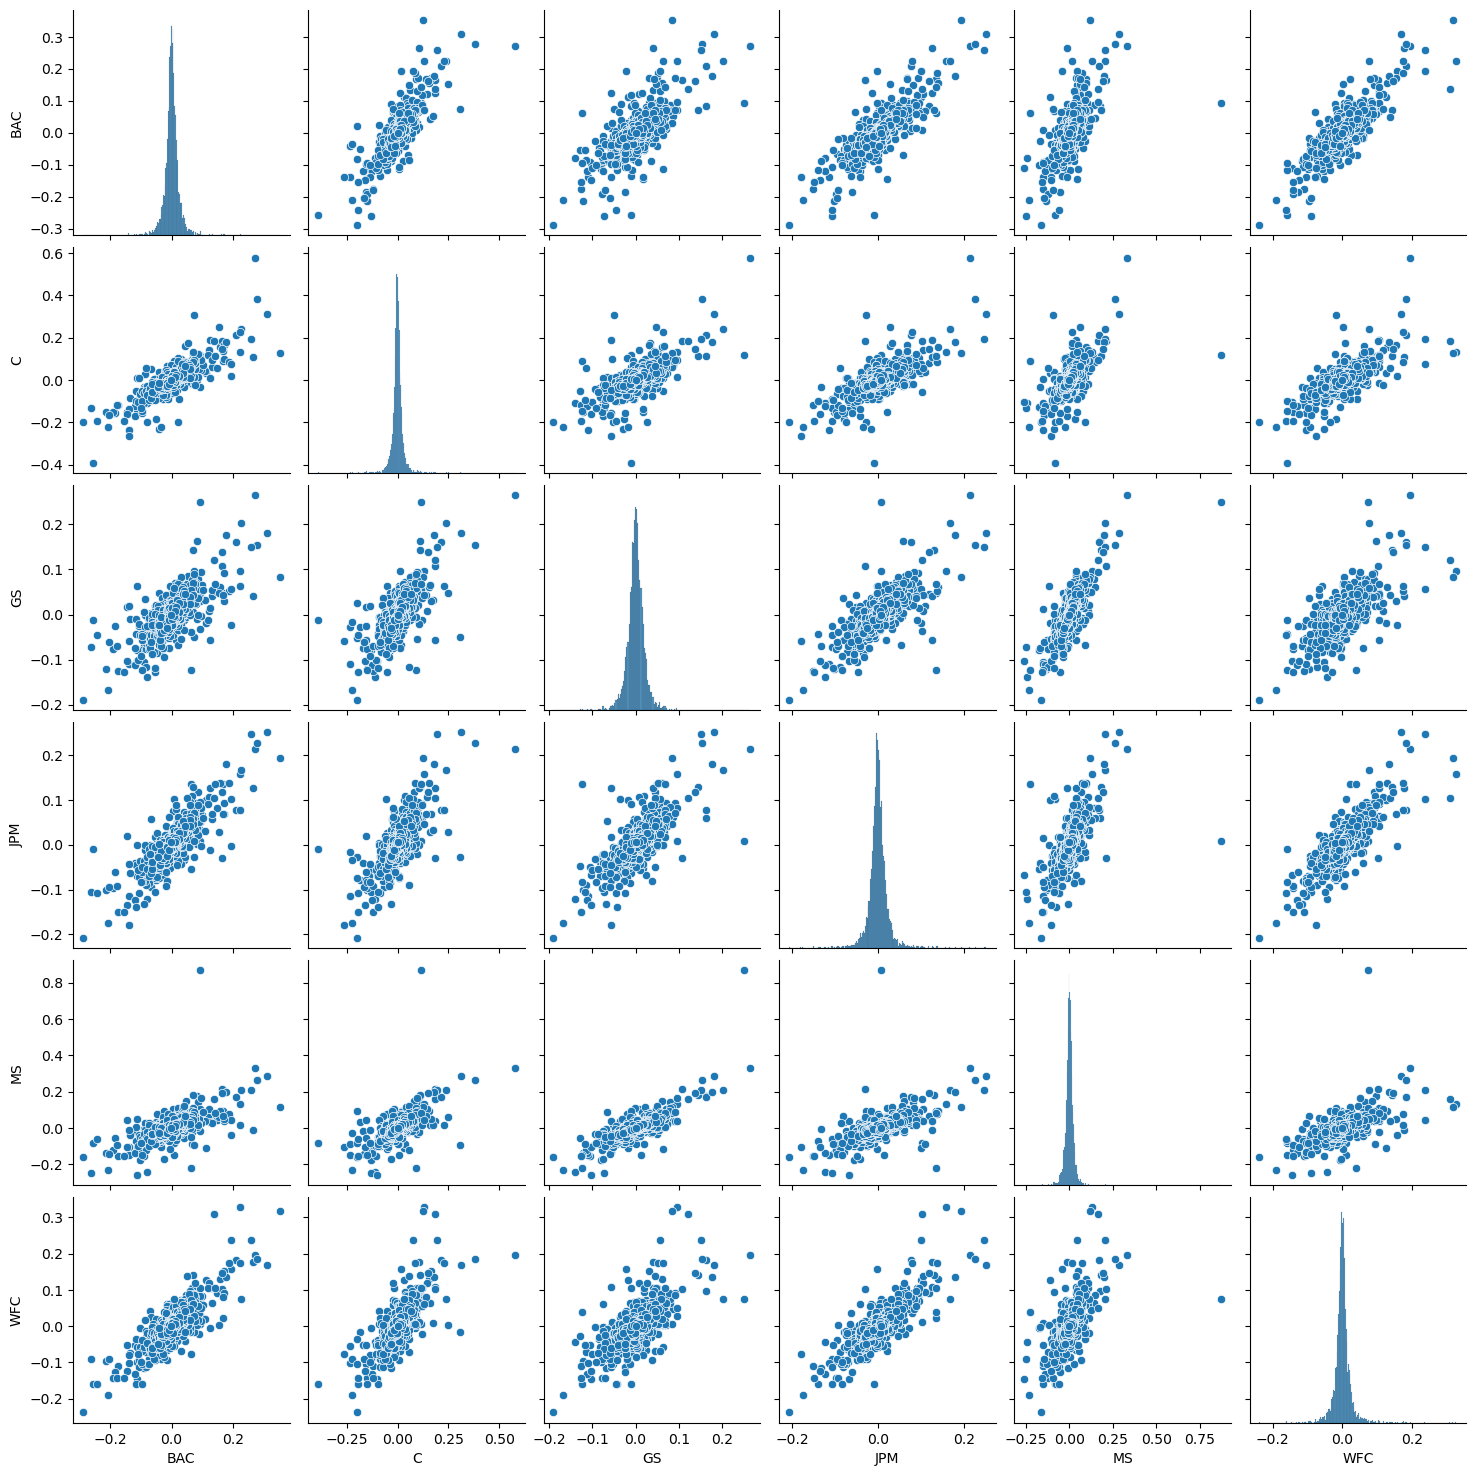

In [12]:
sns.pairplot(returns)

According to the above plots, Morgan Stanley (MS) has the slower slop in comparison with other banks, indicating that in general the return value for Morgan Stanley (MS) is less than other banks.
______

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns **

In [13]:
#the best single day returns
date_max_returns=returns.idxmax()
max_returns=returns.max()
max_returns_df=pd.concat([date_max_returns,max_returns],axis=1)
max_returns_df.columns=['Date','max return']
max_returns_df

Date  max return
BAC 2009-04-09    0.352691
C   2008-11-24    0.578249
GS  2008-11-24    0.264678
JPM 2009-01-21    0.250967
MS  2008-10-13    0.869835
WFC 2008-07-16    0.327645

In [14]:
#the worst single day returns
date_min_returns=returns.idxmin()
min_returns=returns.min()
min_returns_df=pd.concat([date_min_returns,min_returns],axis=1)
min_returns_df.columns=['Date','min return']
min_returns_df

Date  min return
BAC 2009-01-20   -0.289694
C   2009-02-27   -0.390244
GS  2009-01-20   -0.189596
JPM 2009-01-20   -0.207274
MS  2008-10-09   -0.258929
WFC 2009-01-20   -0.238223

The worst returns for 4 banks happened on 2009-01-20. Did anything significant happen that day?
By a single search we can figure out what did happened on that day that had effect on stock's price.
_____

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2022?**

In [15]:
returns.std()

BAC    0.031171
C      0.032954
GS     0.023078
JPM    0.024309
MS     0.031985
WFC    0.026867
dtype: float64

Text(0.5, 1.0, 'CitiGroup from 2006 to 2023')

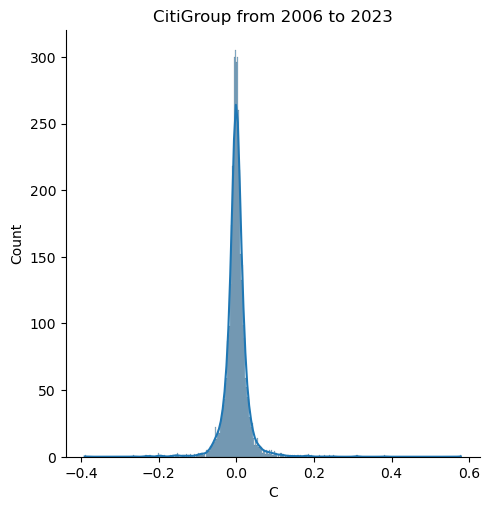

In [16]:
#plotting the distribution of CitiGroup return during Great Recession
sns.displot(returns['C'],kde=True)
plt.title('CitiGroup from 2006 to 2023')

Text(0.5, 1.0, 'CitiGroup during the Great Recession')

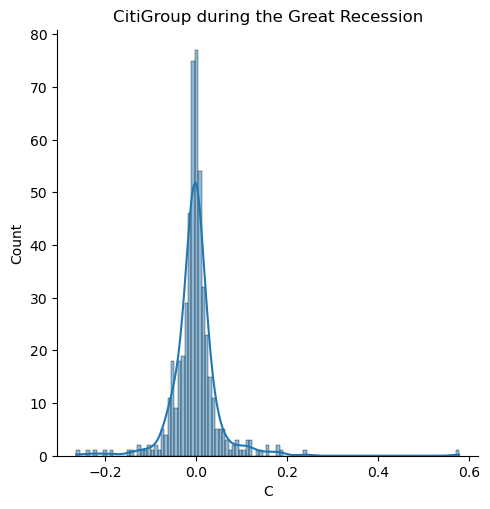

In [17]:
#plotting the distribution of CitiGroup return during Great Recession
sns.displot(returns['C'].loc['2007-01-01':'2009-01-01'],kde=True)
plt.title('CitiGroup during the Great Recession')

The above plot shows standard deviation for return value of CitiGroup which is significantly stretched out.
____

In [18]:
returns['2022-01-01':'2022-12-31'].std()

BAC    0.020498
C      0.021097
GS     0.018670
JPM    0.018911
MS     0.020213
WFC    0.021520
dtype: float64

Text(0.5, 1.0, 'Goldman Sachs in 2022')

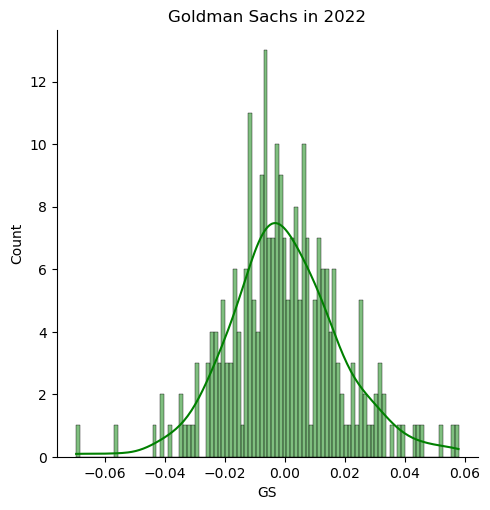

In [19]:
sns.displot(returns.loc['2022-01-01':'2022-12-31']['GS'],color='green',bins=100,kde=True)
plt.title('Goldman Sachs in 2022')

Text(0.5, 1.0, 'JPMorgan Chase in 2022')

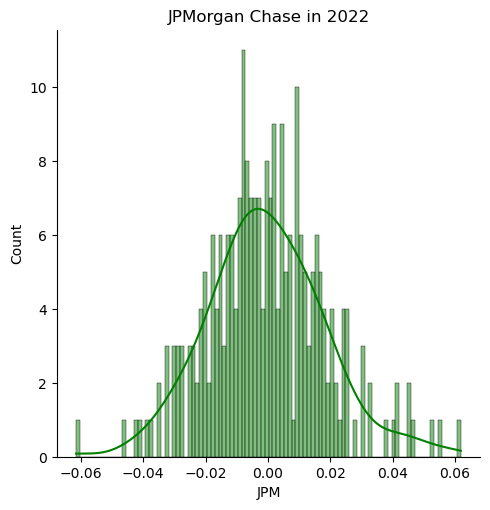

In [20]:
sns.displot(returns.loc['2022-01-01':'2022-12-31']['JPM'],color='green',bins=100,kde=True)
plt.title('JPMorgan Chase in 2022')

In 2022, all the banks had very similar risk profiles. Though, Goldman Sachs (GS) and JPMorgan Chase (JPM) had less std, so they could be interpreted as less riskier stocks compared with others.
_________________


Now let's take advantage of plotly and cufflinks visualisation to create more interactive plots.

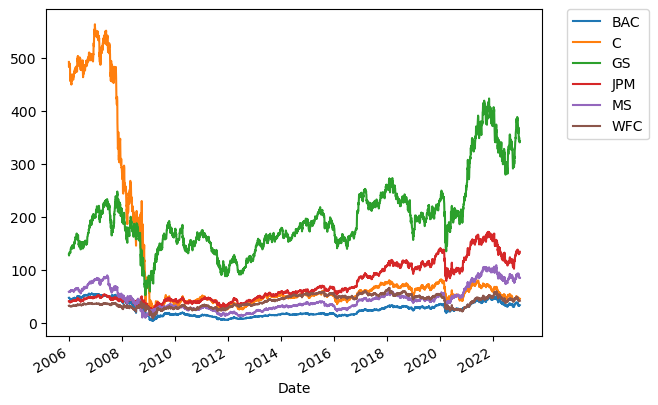

In [32]:
#plotting stock's close price from 2006 to 2022 by using plotly library
bank_stocks.xs('Close',level='stock info',axis=1).iplot()


#plotting stock's close price from 2006 to 2022

bank_stocks.xs('Close',level='stock info',axis=1).plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

According to the above plot we can see that:
* CitiGroup ('C') close price significantly decreased after 2009 (Great Recession) 
* Goldman Sachs ('GS') had a decrese between 2008 and 2010, but increases again quite quickly after recession and its price is reletively higher than the other banks.
________

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

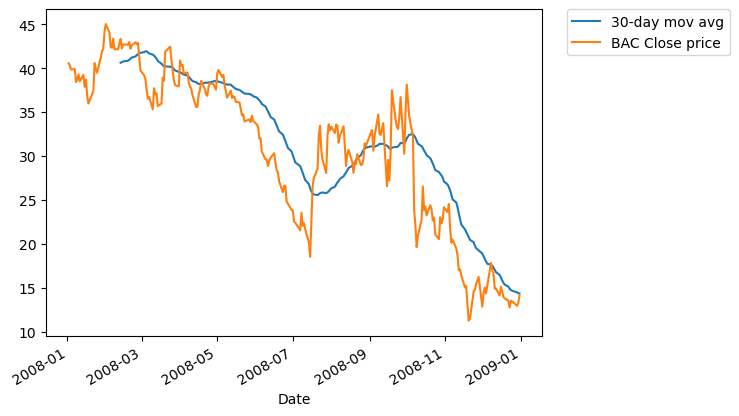

In [22]:
bank_stocks.xs('Close',axis=1,level='stock info')['BAC']['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30-day mov avg')
bank_stocks.xs('Close',axis=1,level='stock info')['BAC']['2008-01-01':'2008-12-31'].plot(label='BAC Close price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

________

We can also use Technical Analysis plots from cufflinks library to plot Moving Average.
* Use .ta_plot(study='sma') to create a Simple Moving Averages plot

In [23]:
bank_stocks.xs('Close',axis=1,level='stock info')['BAC']['2008-01-01':'2008-12-31'].ta_plot(study='sma',period=30)

** Simple Moving Averages plot of Morgan Stanley in 2022.**

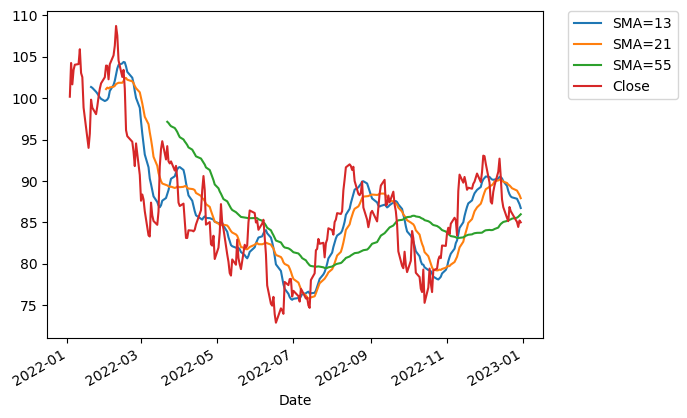

In [24]:
#Simple Moving Averages plot of Morgan Stanley for the year 2022 with 3 different periods, 13,21,55 days with plotly.
MS['Close'].loc['2022-01-01':'2022-12-31'].ta_plot(study='sma',period=[13,21,55])

#Simple Moving Averages plot of Morgan Stanley for the year 2022 with 3 different periods, 13,21,55 days.
MS['Close'].loc['2022-01-01':'2022-12-31'].rolling(window=13).mean().plot(label='SMA=13')
MS['Close'].loc['2022-01-01':'2022-12-31'].rolling(window=21).mean().plot(label='SMA=21')
MS['Close'].loc['2022-01-01':'2022-12-31'].rolling(window=55).mean().plot(label='SMA=55')
MS['Close'].loc['2022-01-01':'2022-12-31'].plot(label='Close')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


_____
For identifying significant, long-term support and resistance levels and overall trends, the 50-day, 100-day and 200-day moving averages are the most common.
The 200-day moving average is considered especially significant in stock trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend. A crossover to the downside of the 200-day moving average is interpreted as bearish.

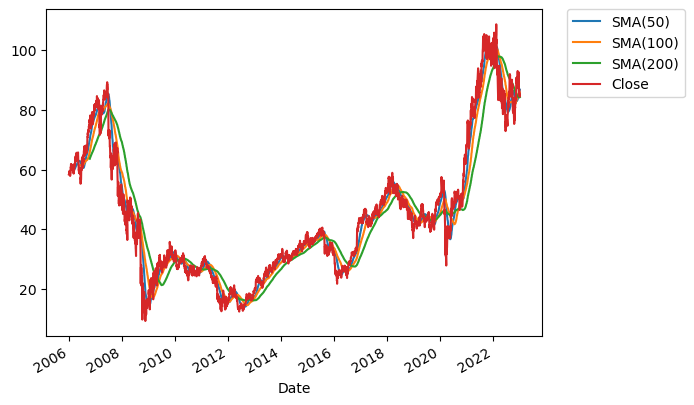

In [25]:
#Simple Moving Averages plot of Morgan Stanley from 2007 to 2023 with 3 different periods, 50,100,200 days.
MS['Close'].ta_plot(study='sma',period=[50,100,200])

MS['Close'].rolling(window=50).mean().plot(label='SMA(50)')
MS['Close'].rolling(window=100).mean().plot(label='SMA(100)')
MS['Close'].rolling(window=200).mean().plot(label='SMA(200)')
MS['Close'].plot(label='Close')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Bollinger Bands

Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price.


In [26]:
# Bollinger Bands for Morgan Stanley in 2022
MS['Close'].loc['2022-01-01':'2022-12-31'].ta_plot(study='boll')

________
# Heatmap
** Create a heatmap of the correlation between the stocks Close Price.**

In [27]:
#correlation between the stocks Close Price.
close_corr=bank_stocks.xs('Close',axis=1,level='stock info').corr()

<AxesSubplot:xlabel='bank ticker', ylabel='bank ticker'>

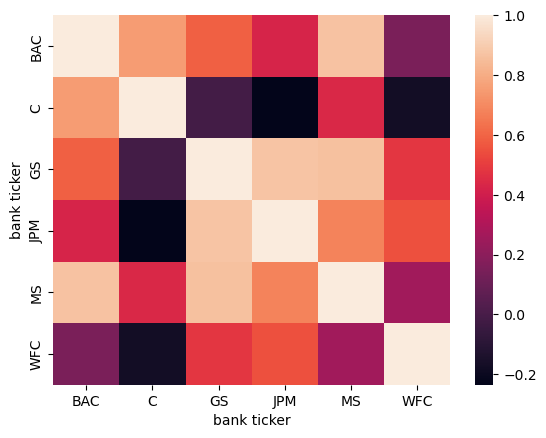

In [28]:
#a heatmap of the correlation between the stocks Close Price
sns.heatmap(close_corr)

_______
** seaborn's clustermap to cluster the correlations together:**

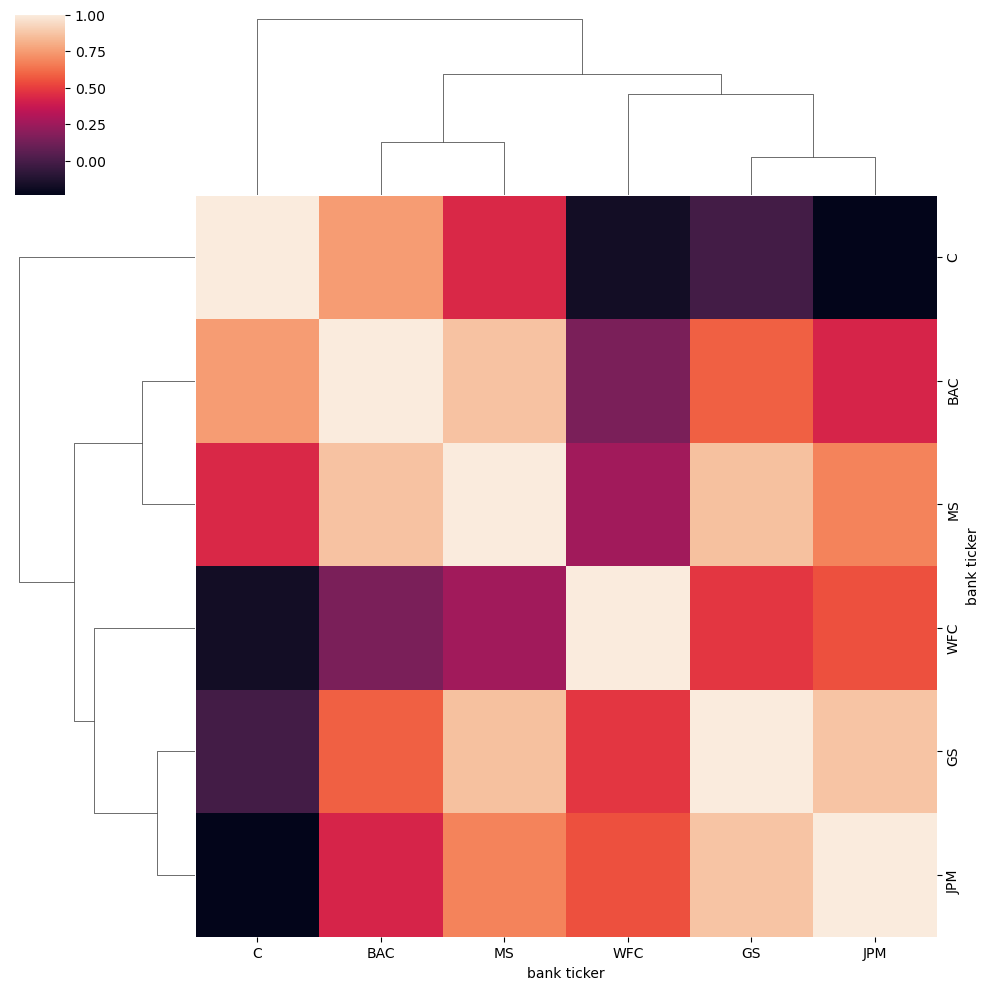

In [29]:
sns.clustermap(close_corr)

In [30]:
#Create a heatmap of the correlation between the stocks Close Price by plotly library
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Candlesticks Chart
** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2022 to Jan 1st 2023.**

The Candlesticks Chart is considered to be the most popular chart type, also the oldest one, developed in the 18th century.

Like the Bar Cart, it represents all four prices of a security - open, high, low, and closing (OHLC), but with open and close represented in the thick body and high and low in the "candlewick".


In [31]:
BAC[['Open','High','Low','Close']].loc['2022-01-01':'2022-12-31'].iplot(kind='candle')